## Linear Regression with one variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [2]:
def load_data():
    data = np.loadtxt("data/restaurant.txt", delimiter=',')
    X = data[:,0]
    Y = data[:, 1]
    return X,Y

In [3]:
# Loading dataset
x_train, y_train = load_data()

In [4]:
# Print x_train
print("Type and first 5 elements of x_train")
print(type(x_train))
print(x_train[:5])

Type and first 5 elements of x_train
<class 'numpy.ndarray'>
[6.1101 5.5277 8.5186 7.0032 5.8598]


In [5]:
# Print y_train
print("Type and first 5 elements of y_train")
print(type(y_train))
print(y_train[:5])

Type and first 5 elements of y_train
<class 'numpy.ndarray'>
[17.592   9.1302 13.662  11.854   6.8233]


In [6]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('Number of training examples', len(x_train))

x_train (97,)
y_train (97,)
Number of training examples 97


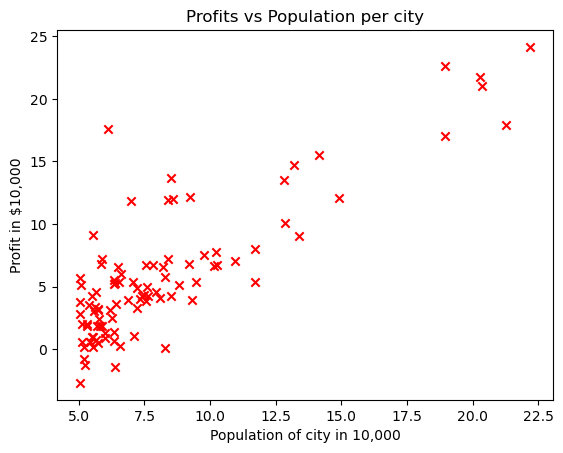

In [7]:
# Visualising data using scatter plot
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of city in 10,000')
plt.show()

In [8]:
# Computes the cost function for the linear regression
def cost_function(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    return cost/(2*m)

In [9]:
w_init = 2
b_init = 1
cost = cost_function(x_train, y_train, w_init, b_init)
print(f'Cost: {cost:.3f}')

Cost: 75.203


In [10]:
# Calculate gradient for 1 batch
def calculate_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i]) * x[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [11]:
w_init = 0.2
b_init = 0.2
temp_dj_dw, temp_dj_db = calculate_gradient(x_train, y_train, w_init, b_init)
print('Gradient: ', temp_dj_dw, temp_dj_db)

Gradient:  -47.41610118114435 -4.007175051546391


In [12]:
# Gradient descent for minimizing cost function for w, b
def gradient_descent(x, y, w_init, b_init, cost_function, gradient_function, alpha, itrs):
    m = x.shape[0]
    track_J = []
    track_w = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(itrs):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x, y, w, b)
            track_J.append(cost)

        if i%math.ceil(itrs/10) == 0:
            track_w.append(w)
            print(f"iteration {i:4}: Cost {float(track_J[-1]):8.2f}")
    
    return w, b, track_J, track_w


In [13]:
w_init = 0
b_init = 0
itr = 1500
alpha = 0.01
w,b,_,_ = gradient_descent(x_train, y_train, w_init, b_init, cost_function, calculate_gradient, alpha, itr)
print(f"w: {w:8.4f} b: {b:8.4f}")

iteration    0: Cost     6.74
iteration  150: Cost     5.31
iteration  300: Cost     4.96
iteration  450: Cost     4.76
iteration  600: Cost     4.64
iteration  750: Cost     4.57
iteration  900: Cost     4.53
iteration 1050: Cost     4.51
iteration 1200: Cost     4.50
iteration 1350: Cost     4.49
w:   1.1664 b:  -3.6303


In [14]:
m = x_train.shape[0]
predictions = np.zeros(m)

for i in range(m):
    predictions[i] = w * x_train[i] + b

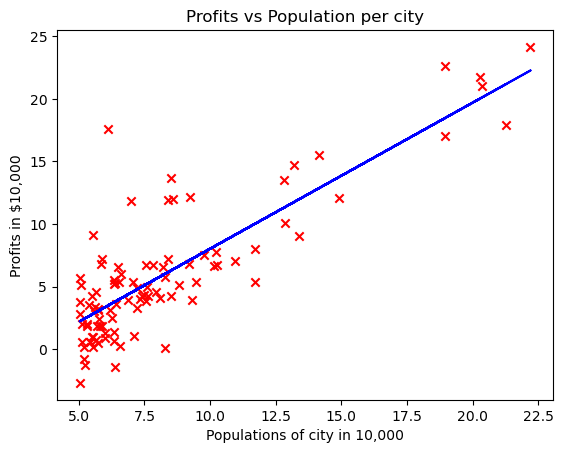

In [15]:
#Plot the model
plt.plot(x_train, predictions, c='b')

#Plot data points
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profits vs Population per city')
plt.ylabel('Profits in $10,000')
plt.xlabel('Populations of city in 10,000')
plt.show()

In [16]:
#Predict profit for a population of 35,000
prediction1 = 3.5 * w + b
print('For population of 35,000, we predict a profit of $%.2f' % (prediction1 * 10000))

For population of 35,000, we predict a profit of $4519.77
